In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import statistics as stat
import seaborn as sns

## Dataset of 22 Exams

In [2]:
df_22 = pd.read_csv('result_22new.csv') # import csv file
x_22 = df_22.to_numpy() # change to numpy array
t_22 = [x_22[i][1] for i in range(len(x_22))] # use list to store x_22
t_22.sort() # sort the dataset

In [3]:
# count the number of exam in every time slot 
temp_22=[]
r_22 = dict()
for i in range(len(t_22)):
    if bool(t_22[i] in temp_22) & bool(t_22[i] in r_22):
        r_22[t_22[i]]+=1 
    else:
        r_22[t_22[i]]=1
        temp_22.append(t_22[i])
result_22 = r_22.items()
da_22 = list(result_22)
na_22 = np.array(da_22)
for i in range(len(na_22)):
    na_22[i][0] = na_22[i][0]+1
d_22 = dict(na_22)

Text(0, 0.5, 'Number of Exam')

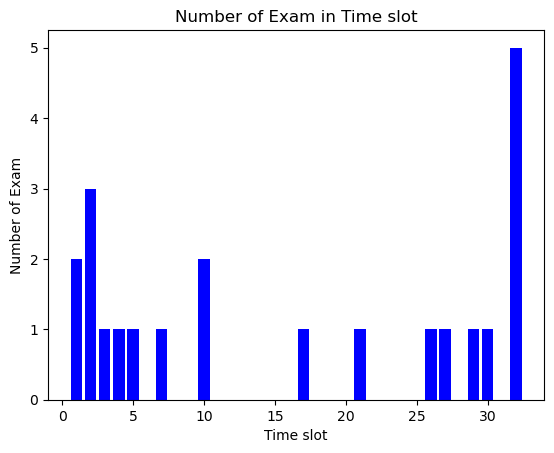

In [4]:
# plot "Number of Exam in Time slot"
plt.bar(d_22.keys(), d_22.values(), color='b')
plt.title("Number of Exam in Time slot")
plt.xlabel("Time slot")
plt.ylabel("Number of Exam")

## Dataset of 95 Exams

In [5]:
# import result data set
df = pd.read_csv('result_95new.csv')
x=df.to_numpy()
t = [x[i][1] for i in range(len(x))]
t.sort()

In [6]:
# count the number of exam in every time slot 
temp=[]
r = dict()
for i in range(len(t)):
    if bool(t[i] in temp) & bool(t[i] in r):
        r[t[i]]+=1 
    else:
        r[t[i]]=1
        temp.append(t[i])
result = r.items()
da = list(result)
na = np.array(da)
for i in range(len(na)):
    na[i][0] = na[i][0]+1
d = dict(na)

Text(0, 0.5, 'Number of Exam')

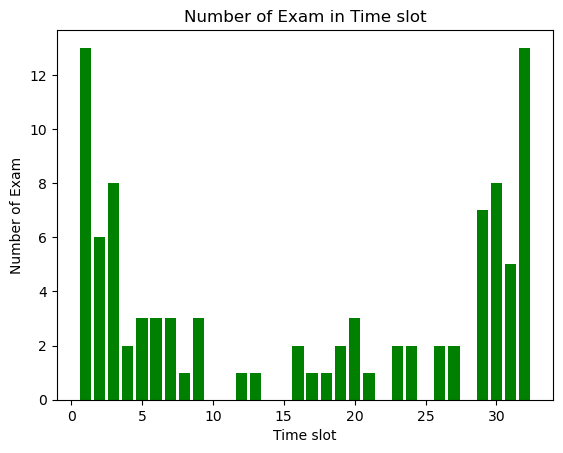

In [7]:
# plot "Number of Exam in Time slot"
plt.bar(d.keys(), d.values(), color='g')
plt.title("Number of Exam in Time slot")
plt.xlabel("Time slot")
plt.ylabel("Number of Exam")

In [8]:
# Find the min gap
student_hash_map = {}
with open('data_95_students.csv', newline='', encoding="utf-8") as csvfile:
    spamreader = list(csv.reader(csvfile, delimiter=','))
    spamreader.pop(0)
    for row in spamreader:
        try:
            student_hash_map[row[0]].append(row[1])
        except KeyError:
            student_hash_map[row[0]] = [row[1]]
student_exam = student_hash_map.items()
student_exam_list = list(student_exam)
remove_one =[]
for i in range(len(student_exam_list)):
    if len(student_exam_list[i][1]) > 1:
        remove_one.append(student_exam_list[i])
for i in range(len(remove_one)):
    for j in range(len(remove_one[i][1])):
        for k in range(len(x)):
            if remove_one[i][1][j] == x[k][0]:
                remove_one[i][1][j] = x[k][1]
for i in range(len(remove_one)):
    remove_one[i][1].sort()
res_min = []
for i in range(len(remove_one)):
    tp = []
    for j in range(len(remove_one[i][1])):
        if (j != len(remove_one[i][1])) & (j != 0):
            m = remove_one[i][1][j] - remove_one[i][1][j-1] - 1
            tp.append(m)
    res_min.append(min(tp))  
res_min.sort()
temp_min=[]
r_min = dict()
for i in range(len(res_min)):
    if bool(res_min[i] in temp_min) & bool(res_min[i] in r_min):
        r_min[res_min[i]]+=1 
    else:
        r_min[res_min[i]]=1
        temp_min.append(res_min[i])

Text(0, 0.5, 'Number of Student')

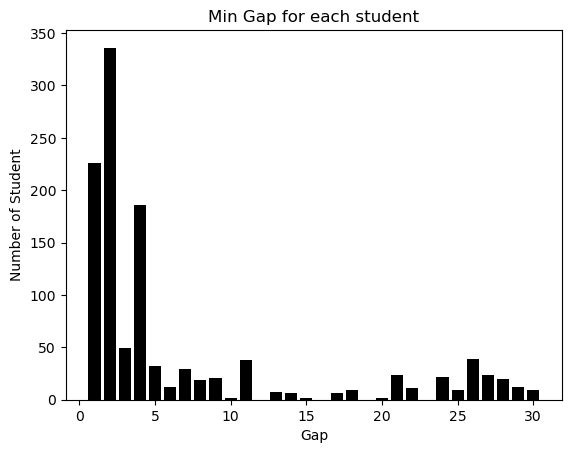

In [9]:
# plot "Min Gap for each student"
plt.bar(r_min.keys(), r_min.values(), color='black')
plt.title("Min Gap for each student")
plt.xlabel("Gap")
plt.ylabel("Number of Student")

In [10]:
# find the mean gap
res95_mean = []
for i in range(len(remove_one)):
    tp = []
    for j in range(len(remove_one[i][1])):
        if (j != len(remove_one[i][1])) & (j != 0):
            m = remove_one[i][1][j] - remove_one[i][1][j-1] - 1
            tp.append(m)
    res95_mean.append(stat.mean(tp))

Text(0, 0.5, 'Number of Student')

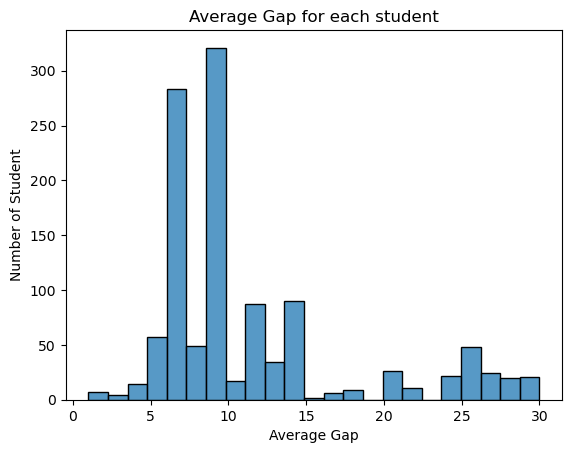

In [11]:
# Plot "Average Gap for each student"
sns.histplot(data=res95_mean,)
plt.title("Average Gap for each student")
plt.xlabel("Average Gap")
plt.ylabel("Number of Student")